# Applied math concepts for machine learning - Group 6 project

Students name in this Group:
- Gabriel Okazaki
- Julio Socher
- Kateryna Solonenko
- Mohit Sabharwal
- Riya Gupta
- Vaibhav Saini

## Reading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Data preprocessing

### Processing 'Sex' categorical column

In [5]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [6]:
df_dummies = pd.get_dummies(df['Sex'], dtype=int)
df_processed = pd.concat([df, df_dummies], axis=1)
del df_processed['Sex']
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


### Processing 'ChestPainType' categorical column

In [7]:
df_processed['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
df_processed['ChestPainType']= encoder.fit_transform(df_processed['ChestPainType'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,0,1


In [10]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}

### Processing 'RestingECG' categorical column

In [11]:
df_processed['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [12]:
encoder = LabelEncoder()
df_processed['RestingECG']= encoder.fit_transform(df_processed['RestingECG'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,N,0.0,Up,0,0,1


In [13]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'LVH': 0, 'Normal': 1, 'ST': 2}

### Processing 'ExerciseAngina' categorical column

In [14]:
df_processed['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [15]:
df_processed['ExerciseAngina'] = df_processed['ExerciseAngina'].replace({'Y':1, 'N':0})
df_processed.head()

/tmp/ipykernel_16302/1365407840.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed['ExerciseAngina'] = df_processed['ExerciseAngina'].replace({'Y':1, 'N':0})


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,0,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,0,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,1,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,0,0.0,Up,0,0,1


### Processing 'ST_Slope' categorical column

In [16]:
df_processed['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [17]:
encoder = LabelEncoder()
df_processed['ST_Slope']= encoder.fit_transform(df_processed['ST_Slope'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1
1,49,2,160,180,0,1,156,0,1.0,1,1,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0
4,54,2,150,195,0,1,122,0,0.0,2,0,0,1


In [18]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'Down': 0, 'Flat': 1, 'Up': 2}

In [19]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   ChestPainType   918 non-null    int64  
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    int64  
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    int64  
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    int64  
 10  HeartDisease    918 non-null    int64  
 11  F               918 non-null    int64  
 12  M               918 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 93.4 KB


### Dealing with null values

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: >

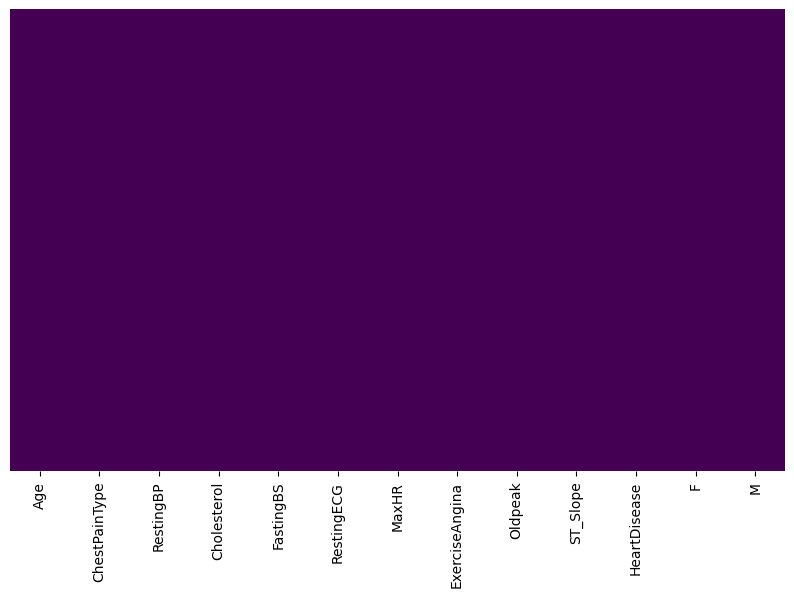

In [21]:
# Only `bmi` has Null values
plt.figure(figsize=(10,6))
sns.heatmap(df_processed.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Splitting dataset

In [22]:
X = df_processed.drop('HeartDisease', axis=1)
X.shape

(918, 12)

In [23]:
y = df_processed['HeartDisease']
y.shape

(918,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

logistic_regression = LogisticRegression(max_iter=10000)
fitted_model = logistic_regression.fit(X_train, y_train)

y_pred = fitted_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Accuracy: 0.8659420289855072
Precision: 0.9166666666666666
Recall: 0.8562874251497006


### GridSearchCV for Logistic Regression

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_search = GridSearchCV(estimator=logistic_regression,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set: {:.2f}".format(accuracy))

precision = precision_score(y_test, y_pred)
print("Precision on Test Set: {:.2f}".format(precision))

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on Test Set: 0.87
Precision on Test Set: 0.92
Recall: 0.8562874251497006


Findings - The accuracy, precision and recall is better when we used GridSearchCV to tune the parameter.

### Auto Feature Selector for Logistic Regression

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

num_feats = 5

def embedded_log_reg_selector(X, y, num_feats):
    embedded_lr_selector = SelectFromModel(LogisticRegression(max_iter=1000), max_features=num_feats)
    embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    return embedded_lr_support, embedded_lr_feature

embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
print(str(len(embedded_lr_feature)), 'selected features') 

print("Selected Features from Lasso Regularization:", embedded_lr_feature)

X_train_selected = X_train[embedded_lr_feature]
X_test_selected = X_test[embedded_lr_feature]

logistic_regression = LogisticRegression(max_iter=10000)
lassoModel = logistic_regression.fit(X_train_selected, y_train)

y_pred_selected = lassoModel.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_selected)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_selected)
print(f"Recall: {recall}")

5 selected features
Selected Features from Lasso Regularization: ['ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'M']
Accuracy: 0.8586956521739131
Precision: 0.9
Recall: 0.8622754491017964


/home/gabs/Projects/2024/george_brown/Math-Labs/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Findings - Removing some features from the dataset lead to reduced accuracy, recall and precision. 

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

## Using the default states for the DecisionTreeClassifier 

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cv_scores=cross_val_score(clf, X, y, cv=10)
cv_accuracy = np.mean(cv_scores)
print(f"The average cross-validation accuracy is: {cv_accuracy}")

accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy for this model is: {accuracy}")

The average cross-validation accuracy is: 0.785248447204969
The accuracy for this model is: 0.7753623188405797


### GridSearchCV for the DT


In [30]:
# Parameters to tune
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['random', 'best'],
    'max_depth': [None, 1, 2, 3, 4, 5,10,15,20,25],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}

## Using GridSearchCV to check the best parameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

## Testing the model with these parameters

clf_adjusted = DecisionTreeClassifier(**best_params, random_state=1)
clf_adjusted.fit(X_train,y_train)
y_pred = clf_adjusted.predict(X_test)

cv_scores_adjusted = cross_val_score(clf_adjusted, X, y, cv=10)
cv_accuracy_adjusted = np.mean(cv_scores_adjusted)
print(f"The average cross-validation accuracy for the best parameters is: {cv_accuracy_adjusted}")

accuracy_adjusted = accuracy_score(y_test, y_pred)

print(f"The accuracy for the best parameters model is: {accuracy_adjusted}")

The average cross-validation accuracy for the best parameters is: 0.820102723363593
The accuracy for the best parameters model is: 0.8333333333333334


The results are way better if using the suggested best paraments GridSearchCV provided

### Removing some columns from the data for analysis

#### Feature Selector

In [31]:
## Doing the auto feature selection using Selector Function
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

### RFE Selector function
num_feats = 5

def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    X_norm = MinMaxScaler().fit_transform(X)
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats,step=10)
    rfe.fit(X_norm, y)
    rfe_support = rfe.get_support()
    rfe_feature = X.loc[:, rfe_support].columns.tolist()
    # Your code ends here
    return rfe_support, rfe_feature

rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
print(str(len(rfe_feature)), 'selected features')

# ### List the selected features from RFE

rfe_feature

5 selected features


['ChestPainType', 'Cholesterol', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

#### Doing analysis with only the columns selected by the Selector

In [32]:
X_train_selected = X_train[rfe_feature]
X_test_selected = X_test[rfe_feature]

selectedFeatures = DecisionTreeClassifier(**best_params, random_state=1)
selectedFeatures.fit(X_train_selected, y_train)
y_pred_selected = selectedFeatures.predict(X_test_selected)

cv_scores_selected = cross_val_score(selectedFeatures, X, y, cv=10)
cv_accuracy_selected = np.mean(cv_scores_selected)
print(f"The average cross-validation accuracy for the best parameters is: {cv_accuracy_selected}")

accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"The accuracy for the best parameters model is: {accuracy_selected}")

The average cross-validation accuracy for the best parameters is: 0.820102723363593
The accuracy for the best parameters model is: 0.8297101449275363


Selecting less columns in this case reduced the accuracy of the model slightly.

## SGD

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, random_state=1)
sgd_clf.fit(X_train_scaled, y_train)
y_pred = sgd_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       109
           1       0.88      0.87      0.87       167

    accuracy                           0.85       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



### GridSearch for SGD

In [36]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet']
}
sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, random_state=1)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_params

{'alpha': 0.01, 'penalty': 'l1'}

In [37]:
best_sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, random_state=1, **best_params)
best_sgd_clf.fit(X_train_scaled, y_train)
y_pred_best = best_sgd_clf.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Best Model - Accuracy: {accuracy_best}")
print("Best Model - Classification Report:\n", report_best)
print("Best Hyperparameters:", best_params)

Best Model - Accuracy: 0.8804347826086957
Best Model - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.92      0.88      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Best Hyperparameters: {'alpha': 0.01, 'penalty': 'l1'}


We got better accuracy and F1-score with the optimized model

### Randomly removing feature from the model

In [38]:
np.random.seed(1)
randomly_selected_features = np.random.choice(X_train_scaled.shape[1], size=10, replace=False)
X_train_reduced = X_train_scaled[:, randomly_selected_features]
X_test_reduced = X_test_scaled[:, randomly_selected_features]

best_sgd_clf.fit(X_train_reduced, y_train)

y_pred_reduced = best_sgd_clf.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
report_reduced = classification_report(y_test, y_pred_reduced)

print(f"Model with Reduced Features - Accuracy: {accuracy_reduced}")
print("Model with Reduced Features - Classification Report:\n", report_reduced)

Model with Reduced Features - Accuracy: 0.8623188405797102
Model with Reduced Features - Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       109
           1       0.91      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



By randomly removing some features, we loss both accuracy and f1-score on the model

## SVM

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model = SVC(
    C=1,
    kernel='linear',
    degree=1,
    gamma=1
)

In [42]:
model.fit(X_train, y_train)

SVC(C=1, degree=1, gamma=1, kernel='linear')

In [43]:
model.score(X_test,y_test)

0.8731884057971014

### GridSearch for SVM

In [44]:
param_grid = {
    'C': [0.1,1, 10, 100, 1000], 
    'gamma': [1,0.1,0.01,0.001,0.0001], 
    'kernel': ['rbf','linear']
} 

In [45]:
svc_model = SVC()

In [46]:
grid = GridSearchCV(svc_model,param_grid,refit=True,verbose=3) 

In [47]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.837 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.853 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.828 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.859 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.829 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.852 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.844 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.837 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.853 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.828 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.859 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.527 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.531 total time=   0.0s
[CV 4/5] END ....C=0.1, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [48]:
best_params = grid.best_params_
best_params

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [49]:
adjested_model = SVC(**best_params, random_state=1)
adjested_model.fit(X_train_scaled,y_train)
y_pred = adjested_model.predict(X_test_scaled)
accuracy_adjusted = accuracy_score(y_test, y_pred)

print(f"Model with Optimized Hyperparameters - Accuracy: {accuracy_adjusted}")

Model with Optimized Hyperparameters - Accuracy: 0.8876811594202898


We got a slightly better accuracy with the optimized model

### Randomly removing a feature from the model

In [50]:
np.random.seed(1)
randomly_selected_features = np.random.choice(X_train_scaled.shape[1], size=10, replace=False)
X_train_reduced = X_train_scaled[:, randomly_selected_features]
X_test_reduced = X_test_scaled[:, randomly_selected_features]

model.fit(X_train_reduced, y_train)

y_pred_reduced = model.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
#report_reduced = classification_report(y_test, y_pred_reduced)

print(f"Model with Reduced Features - Accuracy: {accuracy_reduced}")


Model with Reduced Features - Accuracy: 0.8768115942028986


Removing a feature actually got a better accuracy then the base SVC model, but still lost to the model with optimized hyperparameters